# IMPORTING LIBARIES

In [1]:
                                                                                        # Analysis by Oluwadamilare Tobiloba
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sklearn

# IMPORTING THE DATA FILE

In [2]:
data = pd.read_csv(r"C:\Users\Biggest\Downloads\heart.csv") 

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Variable and Description


age - Age of the patient in years

sex - Gender of the patient (0 = male, 1 = female)

cp - Chest pain type:
0: Typical angina
1: Atypical angina
2: Non-anginal pain
3: Asymptomatic
    
trestbps - Resting blood pressure in mm Hg

chol - Serum cholesterol in mg/di

fbs - Fasting blood sugar level, categorized as above 120 mg/di (1 = true, 0 = false)

restecg - Resting electrocardiographic results:
0: Normal
1: Having ST-T wave abnormality
2: Showing probable or definite left ventricular hypertrophy
    
    
thalach - Maximum heart rate achieved during a stress test

exang - Exercise-induced angina (1 = yes, 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - Slope of the peak exercise ST segment:
0: Upsloping
1: Flat
2: Downsloping
    
    
ca - Number of major vessels (0-4) colored by fluoroscopy


thai - Thalium stress test result:
0: Normal
1: Fixed defect
2: Reversible defect
3: Not described
    
    
target - Heart disease status (0 = no disease, 1 = presence of disease)

# Checking for null value and exploring basic statistic

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# 
 To identify the most relevant factors contributing to heart disease prediction, we can use:
 
  - Corelleation map(Since all our data is numerical)
   
  - BiVariate analysis- Using Scattered plot.

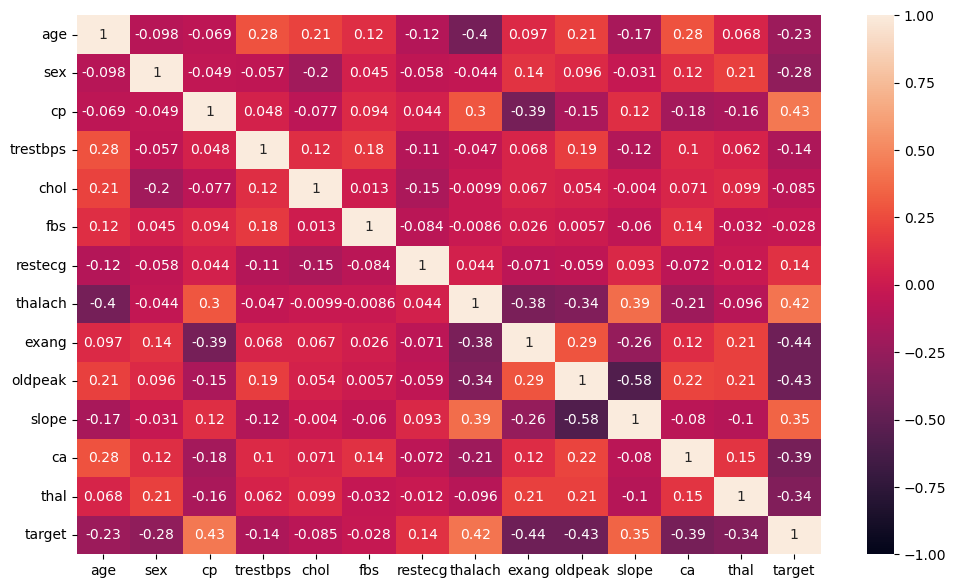

In [6]:
# Checking for correlation, using correlation map.

plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

# OBSERVATIONS :

 - Positive correlation with target: chest pain(cp),Maximum heart rate achieved during a stress test(thalach), slope and restecg
    
 - Negative correlation with target: exang, oldpeak, thal, ca, sex, trestbps and age. 
    
the state above colunms shows some corelation with our dependent colunm(target), hence, they are identified as the most relevant factors contributing to heart disease prediction.

# CHECKING FOR PATTERNS USING SCATTERED PLOT

<Figure size 1300x1700 with 0 Axes>

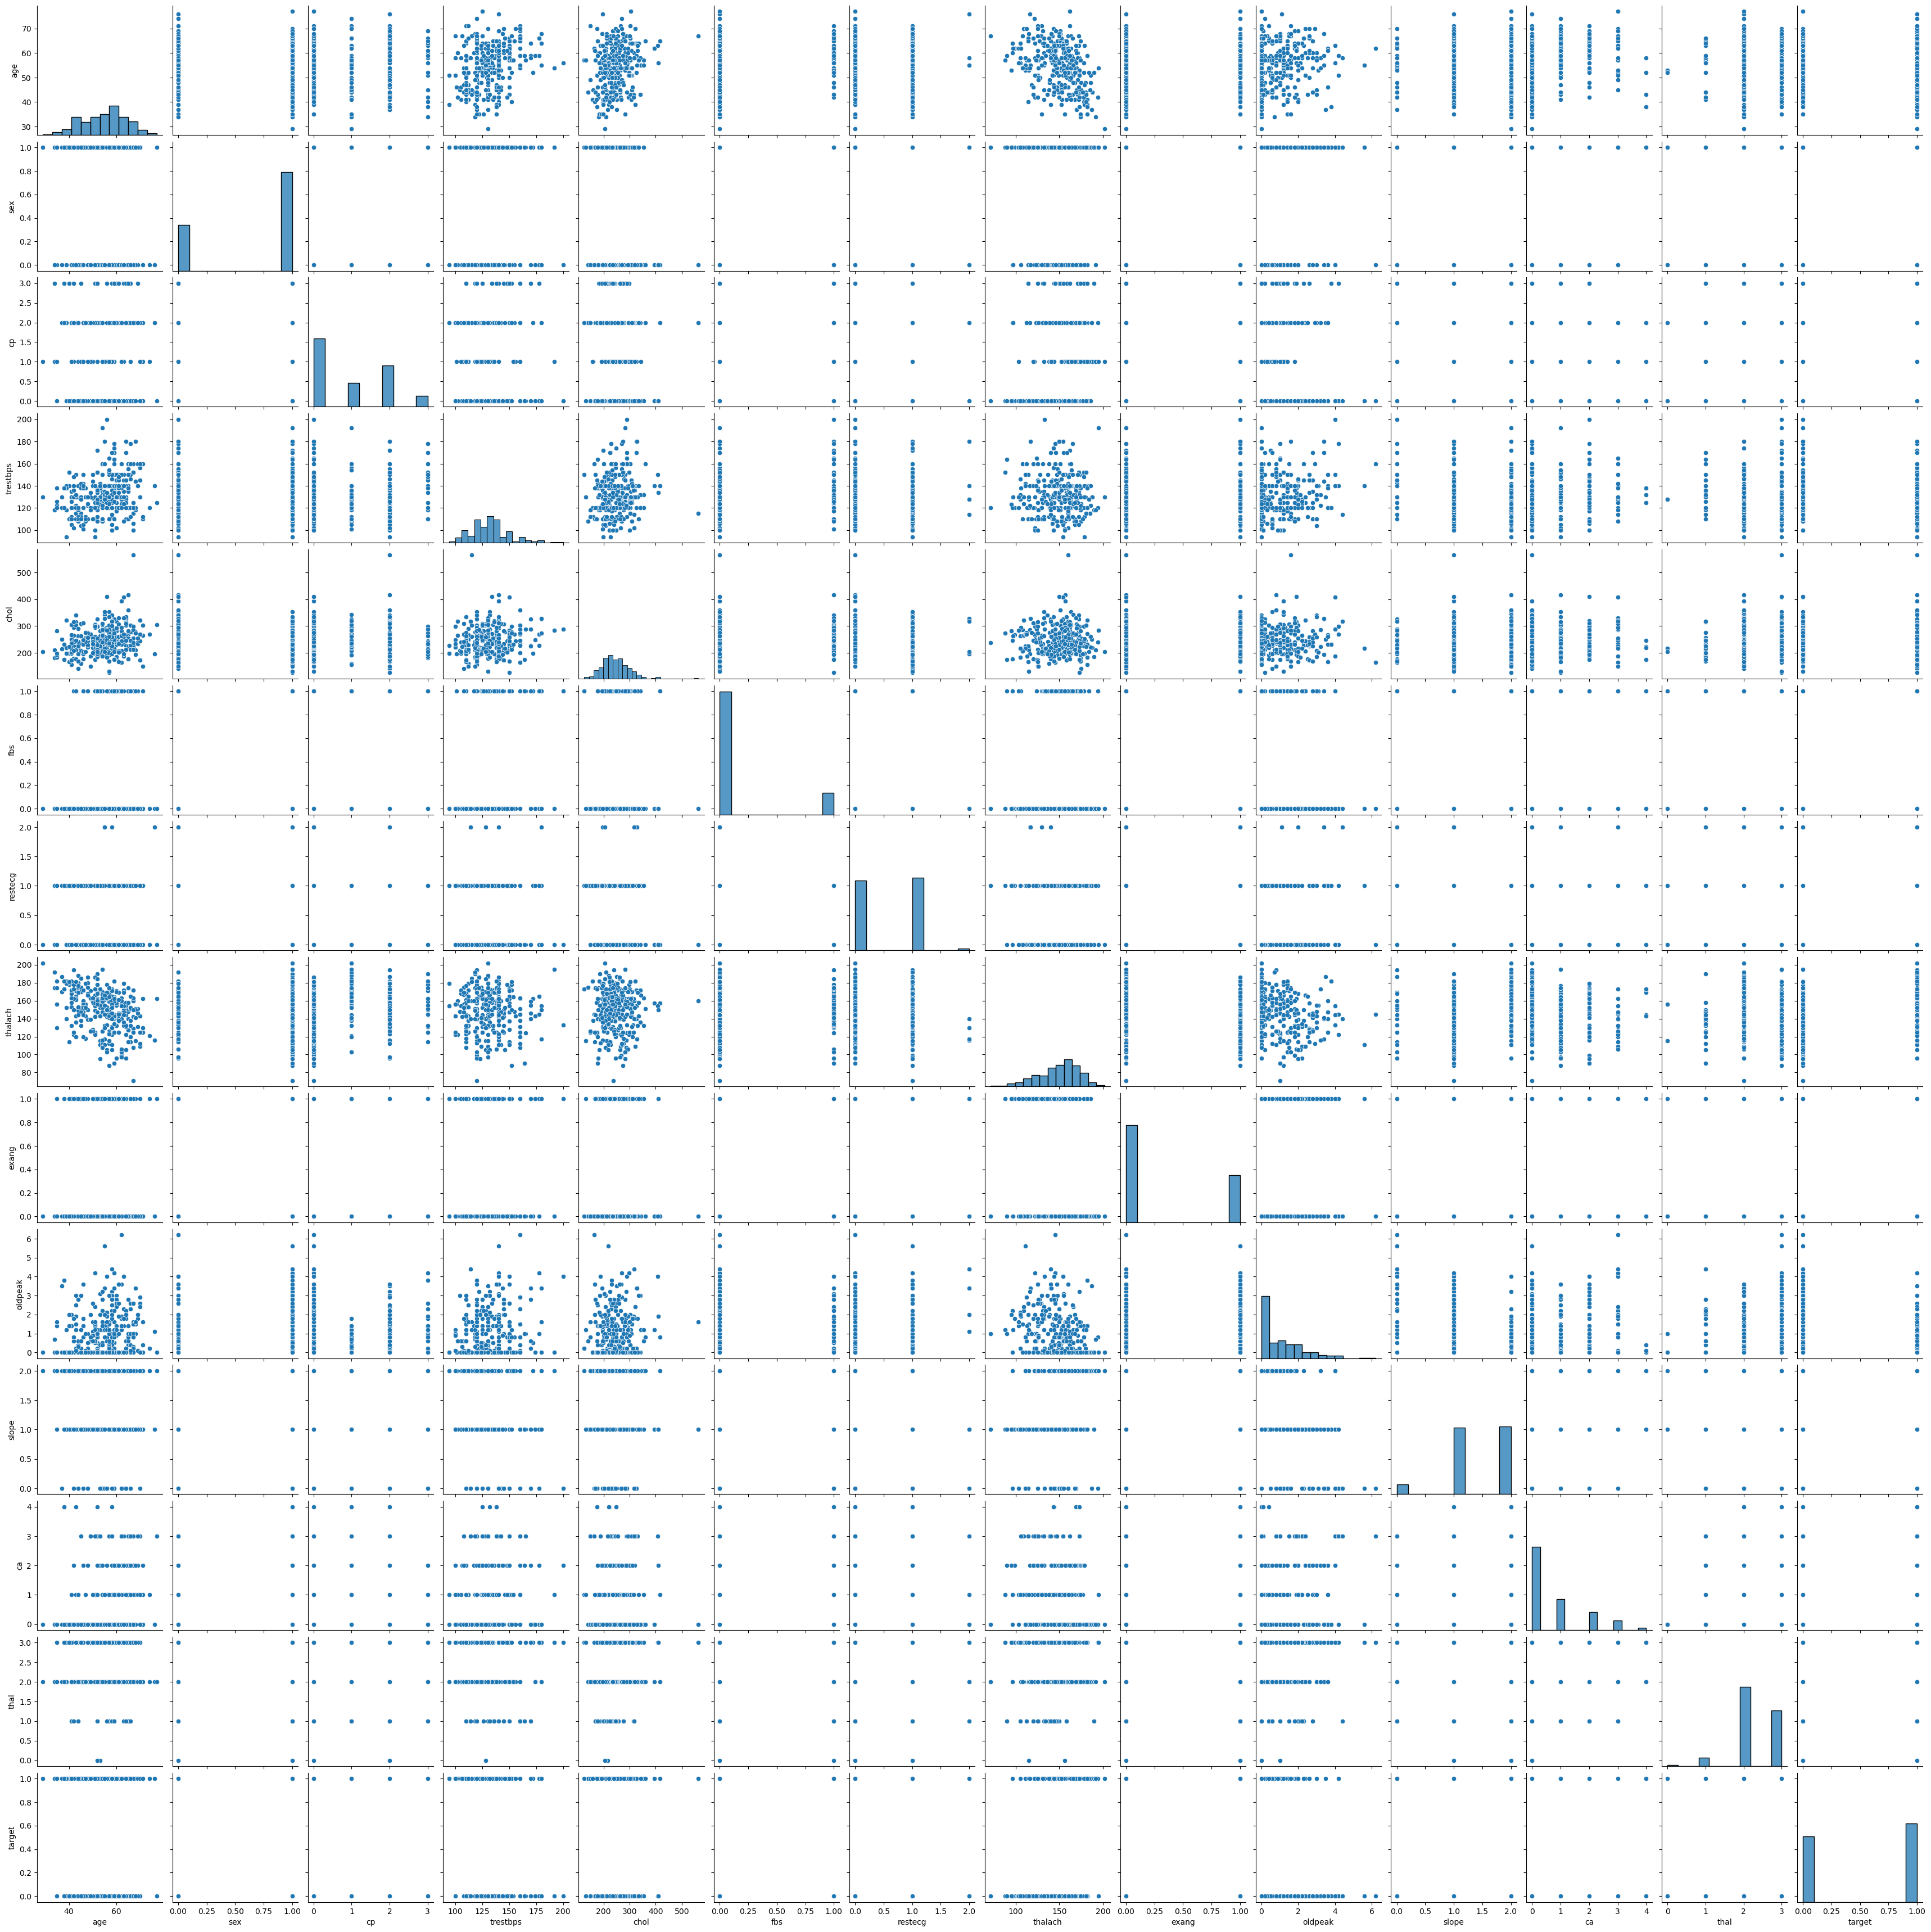

In [7]:
plt.figure(figsize=(13,17))
sns.pairplot(data)
plt.show()

# 
From the graphs above, using btarget as forcus we can see its linerity with oldpeak and thalach, which confirms what we have with our correlation map.

 # CONCLUSION
    * from my analysis done above, i hereby conclude that the below table contains the most relevant factors contributing to heart disease prediction. Hence, every colunm included except 'target' = independent variables while
    target = Dependant variable

In [8]:
df = data.drop(['fbs', 'chol'], axis=1)
df

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,1,123,1,0.2,1,0,3,0
299,45,1,3,110,1,132,0,1.2,1,0,3,0
300,68,1,0,144,1,141,0,3.4,1,2,3,0
301,57,1,0,130,1,115,1,1.2,1,1,3,0


# Significance of feature selection in improving the performance and interpretability of the heart disease prediction model

 * Selecting the features above has helped us eliminate redundances included in the dataframe.
 * With the exclusion of reduncances such as 'chol' and 'fbs', our model performance has been enhanced.
 * The less the noise in the model, the easier the interpretability.

In [9]:
# Analysis by Oluwadamilare Tobiloba                                                                                  

# USING EXHAUSIVE METHOD FOR FEATURE SELECTION

In [10]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
x = data.drop(['target'], axis = 1)
y = data['target']
feature_names = tuple (x.columns)

In [16]:
feature_names

('age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal')

In [13]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [19]:
efs = ExhaustiveFeatureSelector(LGR (max_iter = 100),
                               min_features = 3,
                               max_features =10,
                               scoring ='accuracy',
                               n_jobs = 8,
                               cv = 2)

In [21]:
efs = efs.fit(x,y)

Features: 8008/8008

In [22]:
# Print selected features
print("Best features:", efs.best_feature_names_)

Best features: ('sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal')
